# Regression with Random forest method

In this part, we will show how to use random forest regression with features we extracted earlier. Description about the idea of random forest and decision trees will be given below.

## Loading extracted features...

In [107]:
import pandas as pd 

from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import numpy as np
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from pprint import pprint

font = {'family' : 'DejaVu Sans', 'weight' : 'normal', 'size'   : 13}
mpl.rcParams['figure.figsize'] = (10,10)
mpl.rc('font', **font)

In [2]:
forging_temp_features=pd.read_csv('forging_temp_features.csv',index_col=0)
forging_force_features=pd.read_csv('forging_force_features.csv',index_col=0)
heating_transfer_temp_features=pd.read_csv('heating_transfer_temp_features.csv',index_col=0)


In [3]:
heating_transfer_temp_features.head()

,Max Temp After Heating [°C],Transfer Time [s],Heat Loss Rate [°C/s],Last Temp from Transfer Phase [°C]
1,828.320314,35.90,-7.572806,750.823770
2,828.397446,36.20,-7.584098,745.359682
3,828.326191,36.38,-7.571350,755.186879
4,828.336038,36.46,-7.549796,754.832424
5,828.320620,36.41,-7.490242,755.893418


In [4]:
forging_temp_features.head()

,Forging Temperature Start [K],Forging Temperature ROI [K/s],Forging Box Temperature Mean [K],Forging Box Temperature ROI [K/s]
1,602.732083,1.618284,36.192435,0.001645
2,606.262317,1.906290,36.571765,0.002713
3,609.255466,1.838307,36.930623,0.001947
4,609.371109,1.838493,37.268789,0.001906
5,609.832020,1.815287,37.543507,0.001587


In [5]:
forging_force_features.head()

,Forging Time [s],Forging Phase 1 Force Max [kN],Forging Phase 1 Force ROI [kN/s],Forging Phase 1 Force ROD [kN/s],Forging Phase 1 Force Integral [kNs],Forging Phase 2 Force Max [kN],Forging Phase 2 Force ROI [kN/s],Forging Phase 2 Force ROD [kN/s],Forging Phase 2 Force Integral [kNs],Forging Phase 3 Force Max [kN],...,Forging Phase 3 Force ROD [kN/s],Forging Phase 3 Force Integral [kNs],Forging Phase 4 Force Max [kN],Forging Phase 4 Force ROI [kN/s],Forging Phase 4 Force ROD [kN/s],Forging Phase 4 Force Integral [kNs],Forging Phase 5 Force Max [kN],Forging Phase 5 Force ROI [kN/s],Forging Phase 5 Force ROD [kN/s],Forging Phase 5 Force Integral [kNs]
1,57.19,824.854688,52.644601,250.613387,10011.985167,845.614453,544.263518,86.589598,3263.289838,595.113281,...,147.048340,1639.633969,159.158203,104.366035,25.724617,429.796348,285.100781,166.787860,114.194226,537.726369
2,57.19,822.086719,52.635576,245.475124,9999.280190,834.542578,399.048828,96.483482,3192.063082,581.273438,...,141.625344,1609.546149,148.086328,96.175185,22.123170,396.684521,267.108984,152.593149,105.357369,516.502969
3,57.38,820.702734,53.194275,225.635367,9988.796508,834.542578,494.879262,92.141278,3184.638006,581.273438,...,136.301492,1624.486260,145.318359,92.637663,20.890330,390.705709,262.957031,141.801678,106.020821,515.534179
4,56.89,819.318750,52.802617,238.546051,9982.077264,834.542578,597.476182,89.047057,3191.793205,575.737500,...,139.121145,1629.240246,146.702344,91.905213,22.517206,382.339523,262.957031,146.608514,104.110536,513.707320
5,57.37,813.782812,51.887934,246.289692,9933.160337,833.158594,530.527344,89.573525,3175.060834,578.505469,...,138.398438,1626.375399,145.318359,95.725586,21.016059,385.495008,258.805078,144.213498,103.169744,509.320090


In order to examine impact of different sensors to prediction accuracy first we will observe them separately. We expect that the temperature features will impact more that the others, because temperature of the part is the most important parameter for forging. 

From the three above shown feature matrices, we will take temperature related features into one matrix and the rest of it into second.

## Temperature related features....

There are some temperature related features from forging phase and from heating phase.

In [6]:
temp_related_features=pd.concat([forging_temp_features, heating_transfer_temp_features], axis=1)
temp_related_features.shape

(81, 8)

We end up with 8 features that are from some temperature measurements.

In [7]:
temp_related_features.head()

,Forging Temperature Start [K],Forging Temperature ROI [K/s],Forging Box Temperature Mean [K],Forging Box Temperature ROI [K/s],Max Temp After Heating [°C],Transfer Time [s],Heat Loss Rate [°C/s],Last Temp from Transfer Phase [°C]
1,602.732083,1.618284,36.192435,0.001645,828.320314,35.90,-7.572806,750.823770
2,606.262317,1.906290,36.571765,0.002713,828.397446,36.20,-7.584098,745.359682
3,609.255466,1.838307,36.930623,0.001947,828.326191,36.38,-7.571350,755.186879
4,609.371109,1.838493,37.268789,0.001906,828.336038,36.46,-7.549796,754.832424
5,609.832020,1.815287,37.543507,0.001587,828.320620,36.41,-7.490242,755.893418


## Random Forest Regression

One of the most popular methods in machine learning in general is Random forest. A big advantage of this method is because it can be used for both classification and regression problems. We have the regression problem here, so we will show how it can be used for regression.

Random forest regression uses multiple decision trees, and technique known as _bagging_. It trains every decision tree with different data sample and then final decision is made basen on "opinion" of multiple decision trees.

Random Forest is even more extended over bagging. It takes one extra step where it also takes the random selection of features rather than using all features.

We need to say something about the decision trees, also, because it is the main part of the forest. Decision tree builds regression models in the form of a tree structure. It consist of decision nodes and leaf nodes.

Very simple usage of decision tree is showed in the next picture, where we can see decision and leaf nodes:

![decisionTree](pictures/decisionTree.png)

We see that the data is splitted until some conclusions can be made. We will show the decisin tree from this work after applying the method. 

Now, with these informations, we can try the method on these available features...

### Let's import the atrget matrix (vector)...

In [9]:
target=pd.read_excel(Path('Data')/'AFRC Radial Forge - Zenodoo Upload v3'/'Data'/'CMMData.xlsx', index_col=3)
target=target.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])
#target.index

nominal_val=pd.DataFrame(target.iloc[0:3,:])
target=target.iloc[3:,:]
#Path('Data')/'AFRC Radial Forge - Zenodoo Upload v3'/'Data'/file_format

### ..and then scale the features..

We will take one column from target matrix and use it as target vector. We talked about this in `1_Importing_the_Target(Output)_Matrix.ipynb` and you can chek again for more informations about the target.

In [10]:
X_Temp=temp_related_features.values
scale = StandardScaler()
X_Scale_Temp = scale.fit_transform(X_Temp)
y=target['38 dia @200'].values

### Spliting the data into traning and testing sets..

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_Scale_Temp, y, test_size=0.3)
X_train.shape, X_test.shape

((56, 8), (25, 8))

Now, using Random forest regression, we will fit the model to the traning data, and predict the tesing dataset.

In [12]:
rf1 = RandomForestRegressor(n_estimators=90, random_state=42)
rf1.fit(X_train,y_train)

y_predicted=rf1.predict(X_test)
rf1_score=r2_score(y_test, rf1.predict(X_test))
print("Overall score of Random Forest is:", rf1_score)
rf1_score

Overall score of Random Forest is: 0.570573025796747


0.570573025796747

To get the better picture of Random Forest, we will see one tree from the forest.

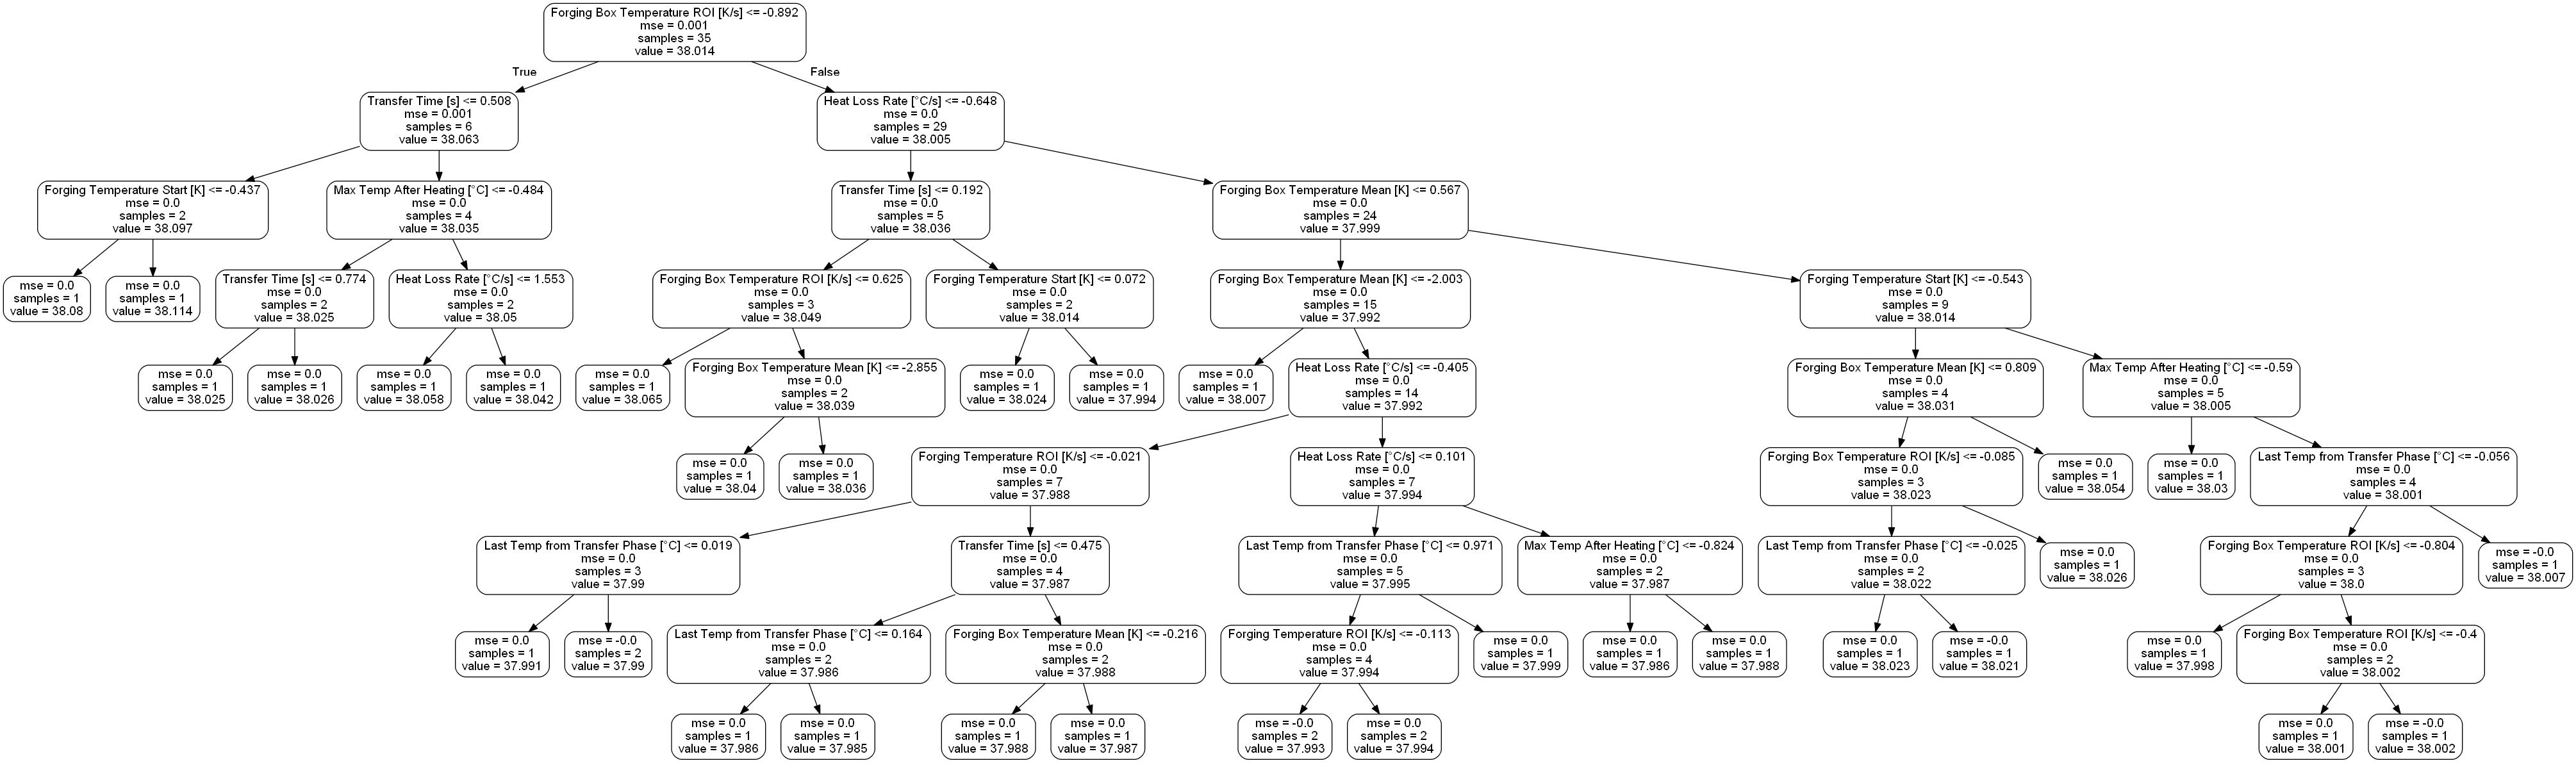

In [13]:
# Tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Take out one tree 
tree = rf1.estimators_[5]

# Export the image 
export_graphviz(tree, out_file = 'tree.dot', feature_names = temp_related_features.columns, rounded = True, precision = 3)
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

from IPython.display import display, Image
display(Image(filename='tree.png'))

You can see that we used `r2_score` to assess how godd this prediction was. It is scikit.learn metric which represents (coefficient of determination) regression score function. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

We can also visualise the prediction to see more. It is actualy not good as we expected to be. 

(37.96162339955849, 38.1283766004415)

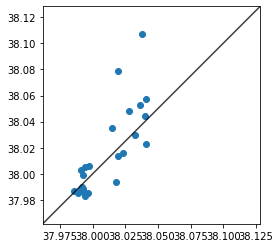

In [14]:
f=plt.figure()
ax=f.add_subplot(111)
ax.scatter(y_predicted, y_test)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

### K Fold Cross Validation

To evaluate the algorithm with relevant score , we will do the k-fold cross validation. k-fold cross validation is a procedure used to estimate the skill of the model on new data.

General procedure with k-fold is:
- Shuffle the dataset randomly.
- Split the dataset into k groups
- For each  group:
    - Take the group as a test data set
    - Take the remaining groups as a training data set
    - Fit a model on the training set and evaluate it on the test set
    - Keep the evaluation score
- Summarize the scores in one overall score

Only important parameter is number of folds (k). Usually, number of fold is 5-10.

The procedure is ilustrated in next picture where 10 folds were used:

<img src="pictures/kFold.png" width="600">


In [29]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=6, random_state=True, shuffle=True)
kf.get_n_splits(X_Scale_Temp)

print(kf)

score_temp=list(range(6))
k=0
for train_index, test_index in kf.split(X_Scale_Temp):
    
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_Scale_Temp[train_index], X_Scale_Temp[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf2 = RandomForestRegressor(n_estimators=90)
    rf2.fit(X_train,y_train)

    rf2_score=r2_score(y_test, rf2.predict(X_test))
    score_temp[k]=rf2_score
    print(k)
    k=k+1
for i in range(len(score_temp)):
    if score_temp[i]<0:
        score_temp[i]=0

print("Score: ",score_temp, "\n")    
print("Overall: ", np.mean(score_temp))

KFold(n_splits=6, random_state=True, shuffle=True)
0
1
2
3
4
5
Score:  [0.45411786875581506, 0.5784467310215657, 0.42896986365598433, 0, 0.627924233395426, 0.4832043880133381] 

Overall:  0.4287771808070216


Let's examine the impact on overall score after adding force related features to these we used at the first place.

## Temperature and force related features....

In [30]:
features=pd.concat([forging_temp_features, heating_transfer_temp_features, forging_force_features], axis=1)
features.shape

(81, 29)

In [31]:
X_All=features.values
scale = StandardScaler()
X_Scale_All = scale.fit_transform(X_All)

In [42]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=6, shuffle=True)
kf.get_n_splits(X_Scale_All)

print(kf)

score_all=list(range(6))
k=0
for train_index, test_index in kf.split(X_Scale_All):
    
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_Scale_All[train_index], X_Scale_All[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf3 = RandomForestRegressor(n_estimators=90)
    rf3.fit(X_train,y_train)

    rf3_score=r2_score(y_test, rf3.predict(X_test))
    score_all[k]=rf3_score
    print(k)
    k=k+1
for i in range(len(score_all)):
    if score_all[i]<0:
        score_all[i]=0

print("Score: ",score_all, "\n")    
print("Overall: ", np.mean(score_all))

KFold(n_splits=6, random_state=None, shuffle=True)
0
1
2
3
4
5
Score:  [0.49906855345093526, 0, 0.5985858813584617, 0.7654930029124214, 0.5896994508713091, 0.6701597123372491] 

Overall:  0.5205011001550627


After runing the regression with and without force related features we see, that there is some improvement in prediction score after adding force related features, which is expected. Probably, score could be even better if we included more sensors, but for that, better understanding of the process is prerequisite. This is aboslutely way to go, one can continue to build on this foundation by extracting more interestin features from the dataset. 

## Randomized Search Cross Validation

One more thing will be showed here, and that is how we can improve the model by tuning the hyperparameters automatically. We know that most of the models have a lot of parameters whose meaning is not so clear for us. Even if we don't know the parameter meaning, we can still tune the parameters by trying a lot of them and then comparing the prediction score.

Let's look at the example of Random Forest Regression:

In [44]:
rf=RandomForestRegressor(random_state = 42)
pprint(rf.get_params())

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


We will try to tune these parameters in Random Forest:    
- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

We will do that by using RandomizedSearch Cross Validation. Using Scikit-Learn’s RandomizedSearchCV method, we define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values. Now, let's set some values in arbitrary range. 

In [45]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 400, num = 20)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [3, 4, 5, 6, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8, 10, 14]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6, 8, 10, 14],
 'min_samples_split': [3, 4, 5, 6, 10],
 'n_estimators': [20,
                  40,
                  60,
                  80,
                  100,
                  120,
                  140,
                  160,
                  180,
                  200,
                  220,
                  240,
                  260,
                  280,
                  300,
                  320,
                  340,
                  360,
                  380,
                  400]}


#### Let's run the method with defined grid..
We will try 150 combiantions out of these available in the grid.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_Scale_All, y, test_size=0.2)
X_train.shape, X_test.shape

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state=42)

# Random search, using 6 fold cross validation across 150 different combinations.
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 150, cv = 6, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 6 folds for each of 150 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  1.3min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=6, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


#### Best parameters are giver here:

In [47]:
best_random = rf_random.best_estimator_
rf_random.best_params_

{'n_estimators': 240,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

We will evaluate the score of tuned model usins k-fold cross validation again, and it can be compared to not tuned model.

In [48]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=6, shuffle=True)
kf.get_n_splits(X_Scale_All)

print(kf)

score_all=list(range(6))
k=0
for train_index, test_index in kf.split(X_Scale_All):
    
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_Scale_All[train_index], X_Scale_All[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
    best_random.fit(X_train,y_train)

    rf3_score=r2_score(y_test, best_random.predict(X_test))
    score_all[k]=rf3_score
    print(k)
    k=k+1
for i in range(len(score_all)):
    if score_all[i]<0:
        score_all[i]=0

print("Score: ",score_all, "\n")    
print("Overall: ", np.mean(score_all))

KFold(n_splits=6, random_state=None, shuffle=True)
0
1
2
3
4
5
Score:  [0.5379914895619845, 0.24455774193565982, 0.6024469797919096, 0.6173268807162303, 0.1589417322577369, 0.6983421756237396] 

Overall:  0.4766011666478769


It is not giving better results that wihtout the tuning, but at least we know how to tune the parameters, and sometimes it works.

Let's plot example of regression graph with all temperature and force features now..

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_Scale_All, y, test_size=0.2)
X_train.shape, X_test.shape

best_random.fit(X_train,y_train)

y_predicted=best_random.predict(X_test)
best_random_score=r2_score(y_test, best_random.predict(X_test))
print("Overall score of Random Forest is:", best_random_score)
best_random_score

Overall score of Random Forest is: 0.8617506874059988


0.8617506874059988

Text(0, 0.5, '38 dia @200 predicted')

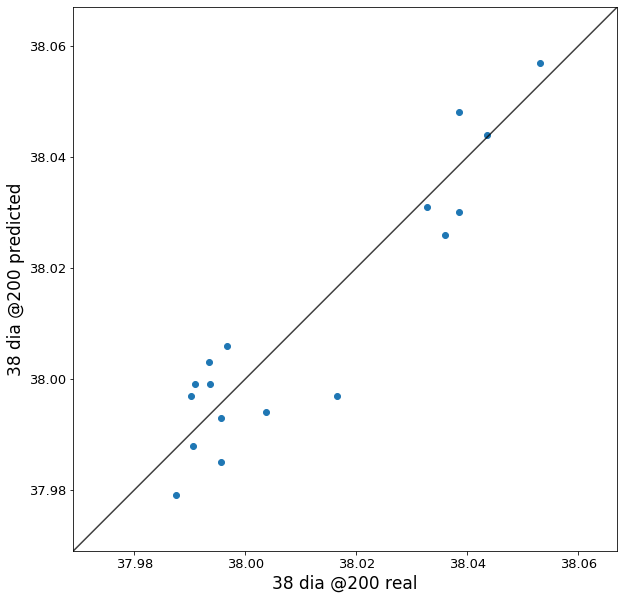

In [110]:
f=plt.figure()
ax=f.add_subplot(111)
ax.scatter(y_predicted, y_test)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xlabel('38 dia @200 real', fontsize=17)
ax.set_ylabel('38 dia @200 predicted', fontsize=17)